# NN play time

Goal here is to get a 3D plot of E as $w_1$ and $w_2$ are changed (using two training values).

[ 1.11310674  1.57880381]
w_values.shape:  (600,)
x.shape:  (2, 2)
x:  [[-0.55931681  1.08169701]
 [-0.69641024 -0.50124188]]
x[ 0 ][ 0 ]:  -0.559316807323
x[ 0 ][ 1 ]:  1.08169701341
wx_values.shape:  (2, 600)
sumwx_values[13,12]:  0.0
sumwx_values.shape:  (600, 600)
y_hat.shape:  (600, 600)
y[ 0 ]:  1.11310674127
x[ 1 ][ 0 ]:  -0.696410241804
x[ 1 ][ 1 ]:  -0.501241883365
wx_values.shape:  (2, 600)
sumwx_values[13,12]:  0.0
sumwx_values.shape:  (600, 600)
y_hat.shape:  (600, 600)
y[ 1 ]:  1.57880381183
E.shape:  (600, 600)
xs.shape:  (600, 600)
ys.shape:  (600, 600)
[[-15.   -15.   -15.   ..., -15.   -15.   -15.  ]
 [-14.95 -14.95 -14.95 ..., -14.95 -14.95 -14.95]
 [-14.9  -14.9  -14.9  ..., -14.9  -14.9  -14.9 ]
 ..., 
 [ 14.85  14.85  14.85 ...,  14.85  14.85  14.85]
 [ 14.9   14.9   14.9  ...,  14.9   14.9   14.9 ]
 [ 14.95  14.95  14.95 ...,  14.95  14.95  14.95]]


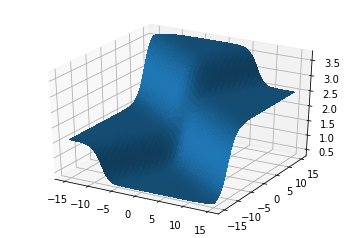

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def y_hat(w_val,index):
    myweights=weights[:]
    myweights[index]=w_val
    return h(x,myweights)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """
    Calculate sigmoid derivative efficiently, call sigmoid only once!
    """
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def h(inputs,weights):
    return sum(inputs*weights)

def visualise(seed,n_mu,x,y):
    start_w=-15
    end_w=15
    step=0.05
    steps=int((end_w-start_w)/step)

    w_values = np.arange(start_w,end_w,step)

    # Use to same seed to make debugging easier
    np.random.seed(seed)

    # Initialize weights
    weights = np.random.normal(scale=1 / 2**.5, size=2)
    
    #visualize results
    print("w_values.shape: ",w_values.shape)
    print("x.shape: ",x.shape)
    print("x: ",x)
    
    # 0 broadcasted on first use
    E=0
    for mu in range(n_mu):
                
        wx_values=np.zeros((2,steps))
        for i in range(2):
            print("x[",mu,"][",i,"]: ",x[mu][i])
        
            wx_values[i]=w_values*x[mu][i]
            
#            print("wx_values[",i,"]: ",wx_values[i])

        # wx_values.shape=(2,steps) i.e. every combination of 2 'x's and steps 'weights'
        print("wx_values.shape: ",wx_values.shape)

        sumwx_values=np.zeros((steps,steps))
        print("sumwx_values[13,12]: ", sumwx_values[13,12])
        for i in range(steps):
            for j in range(steps):
                # The sum of every combination of:
                # - x[0] multiplied with every combination of wx_values
                # - x[1] multiplied with every combination of wx_values
                sumwx_values[i][j]=wx_values[0][i]+wx_values[1][j]

        print("sumwx_values.shape: ",sumwx_values.shape)

        y_hat=sigmoid(sumwx_values)
#        y_hat=sumwx_values
        print("y_hat.shape: ",y_hat.shape)
        
        print("y[",mu,"]: ",y[mu])

        E+=(y[mu]-y_hat)**2

    print("E.shape: ",E.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs=np.tile(w_values,(steps,1))
    print("xs.shape: ",xs.shape)
#    print(xs)

    ys=np.tile(w_values[:,None],(1,steps))
    print("ys.shape: ",ys.shape)
    print(ys)

    ax.plot_surface(xs,ys,E,linewidth=0,antialiased=False)
    plt.show()


# Sort out random seed!
# TBD
seed=np.random.seed(3454)

# n_features hard-coded to 2 ... life is hard enough right now
n_mu=2

# Initialize
x = np.random.normal(scale=1 / 2**.5, size=2*n_mu).reshape(n_mu,2)
y = np.random.rand(n_mu)*4
print(y)
# Multiply by number

visualise(seed,n_mu,x,y)
